# TWEETS CLASSIFICATION

This exercise is based on the statment of a competition from kaggle (see link below), where the objective was to construct a model that did predictions of which tweets were about natural disasters and which weren't.

https://www.kaggle.com/vstepanenko/disaster-tweets

## 0. Imports

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os

## 1. Dataset importing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Curso DL Udemy/Tensorflow/train.csv')
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Curso DL Udemy/Tensorflow/test.csv')

X_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
X_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## 2. Data visualization

In [7]:
print("Size train set: ", len(X_train))
print("Size test set: ", len(X_test))


Size train set:  7613
Size test set:  3263


In [9]:
# Tweets of each side from the train set
X_train['target'].value_counts()  # 0 for non- nature disaster tweets

# It is more or less balanced

0    4342
1    3271
Name: target, dtype: int64

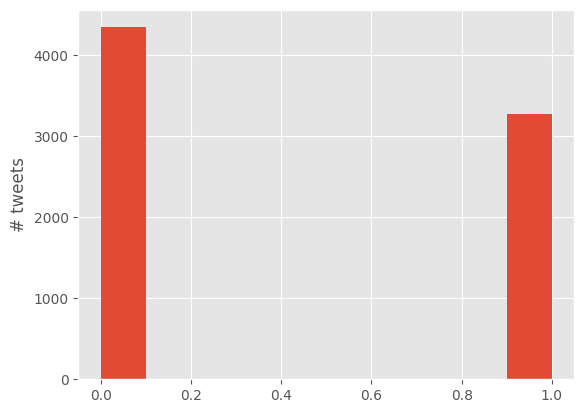

In [10]:
X_train['target'].hist()
plt.ylabel("# tweets")
plt.show()

### Exploratory data analysis

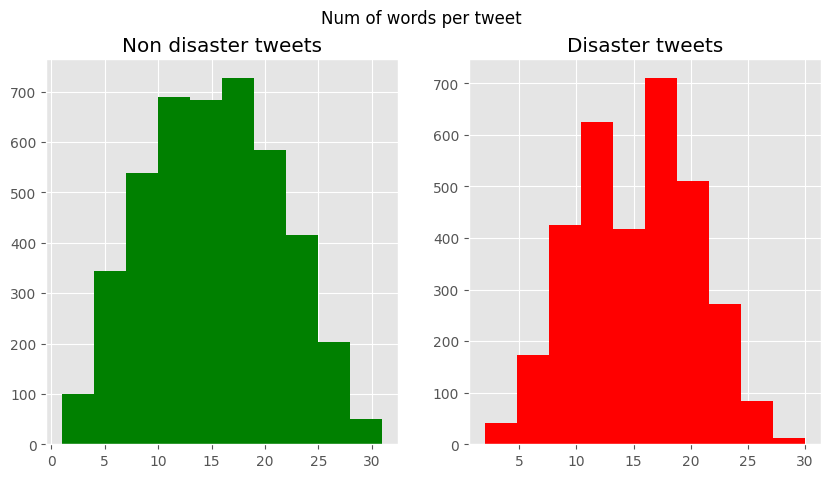

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculate the number of words
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Num of words per tweet')

plt.show()

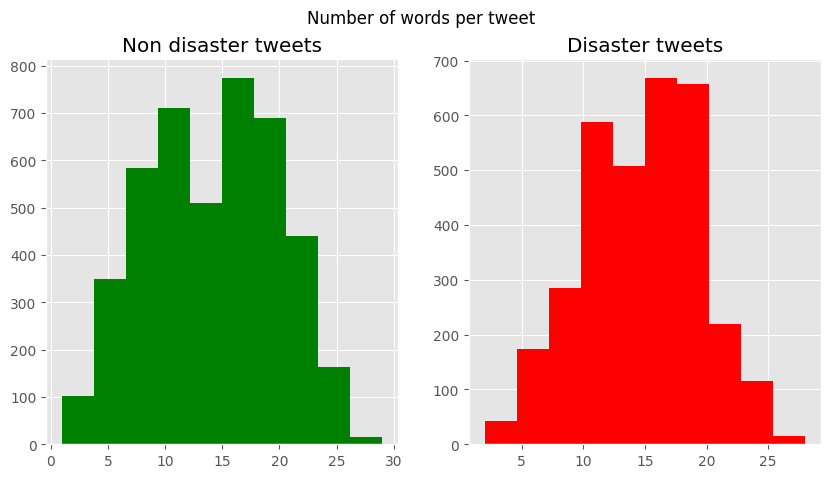

In [12]:
# unique words per tweet

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculate number of tweets
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Number of words per tweet')

plt.show()

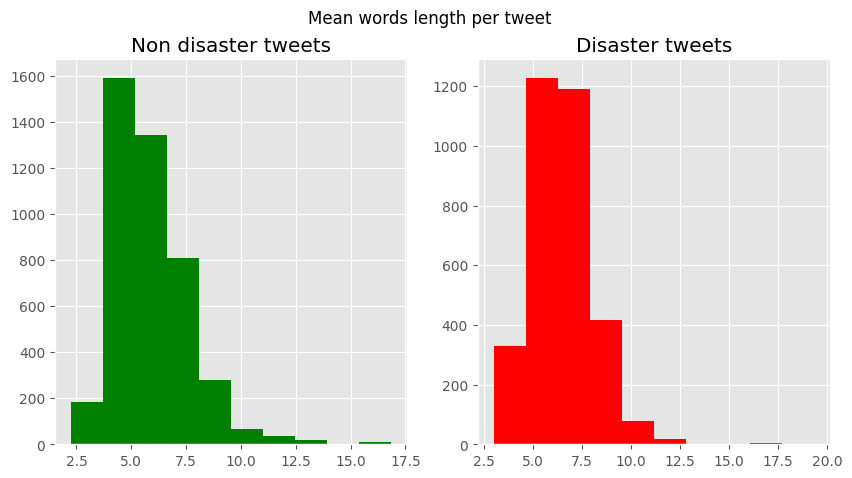

In [13]:
# mean length of words per tweet

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Mean words length per tweet')

plt.show()

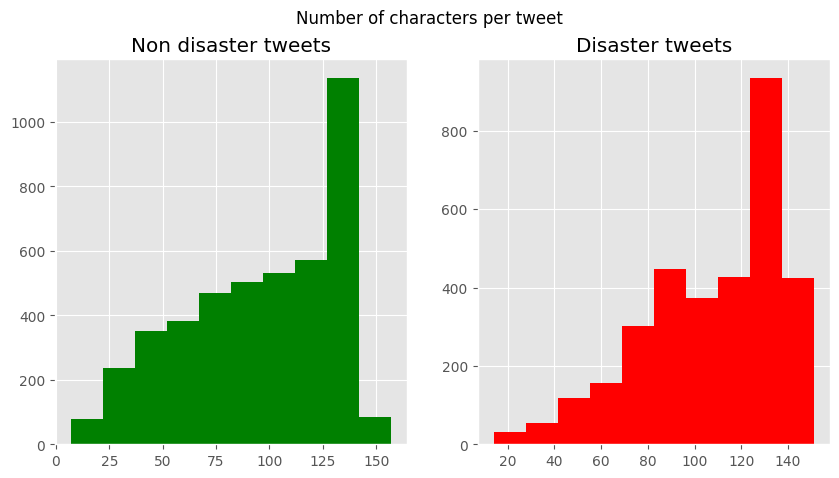

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Number of characters per tweet
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.len()
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Number of characters per tweet')

plt.show()

Other characteristics we could calculate are:

* Number of ending words per Tweet
* Number of urls per Tweet
* Average number of characters per Tweet
* Number of characters per Tweet
* Number of punctuation marks per Tweet
* Number of hashtags per Tweet
* Number of @ per tweet



### Stopwords

These words do not have a meaning on their own, they modify or join other words. In this group we can distinguish articles, pronouns, prepositions, adverbs...

Normally, during the processing step of natural language, they are filtered because they have no significance.


In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def plot_stopwords(label):
    tweets_stopwords = {}
    for words in X_train[X_train['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(stopwords.words('english')))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

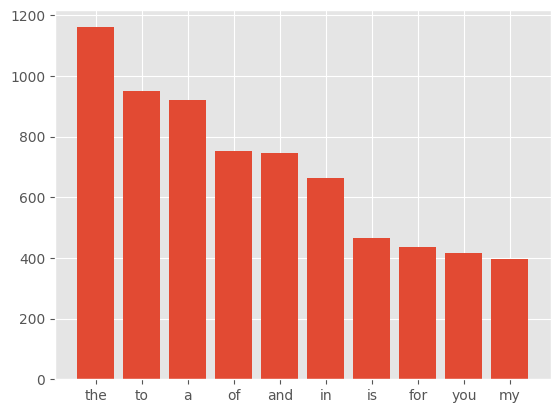

In [25]:
plot_stopwords(0)

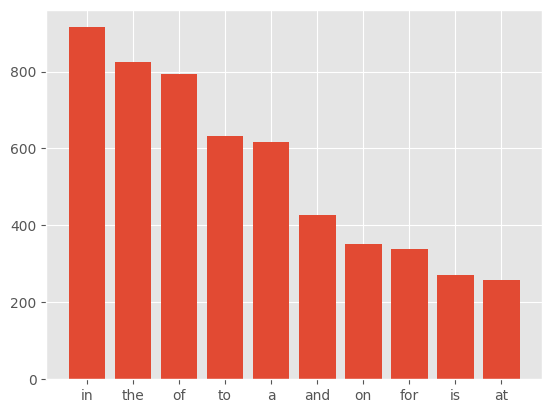

In [26]:
plot_stopwords(1)

#### Punctuation sign analysis

In [27]:
import string

def plot_punctuation(label):
    tweets_stopwords = {}
    for words in X_train[X_train['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

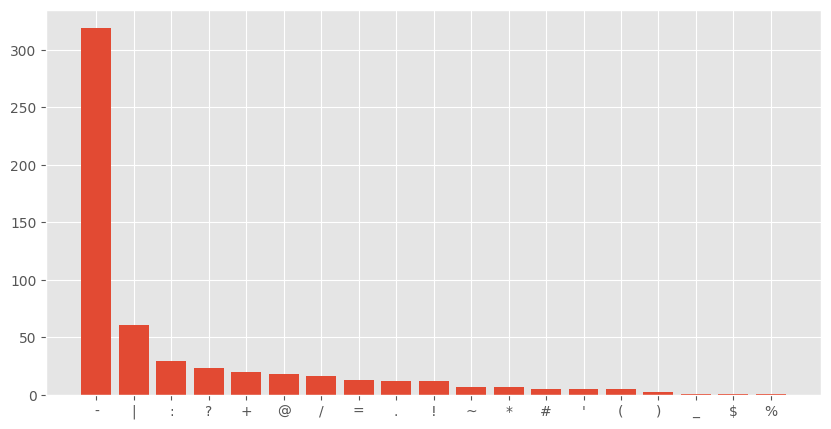

In [28]:
plot_punctuation(0) # non-disaster tweets

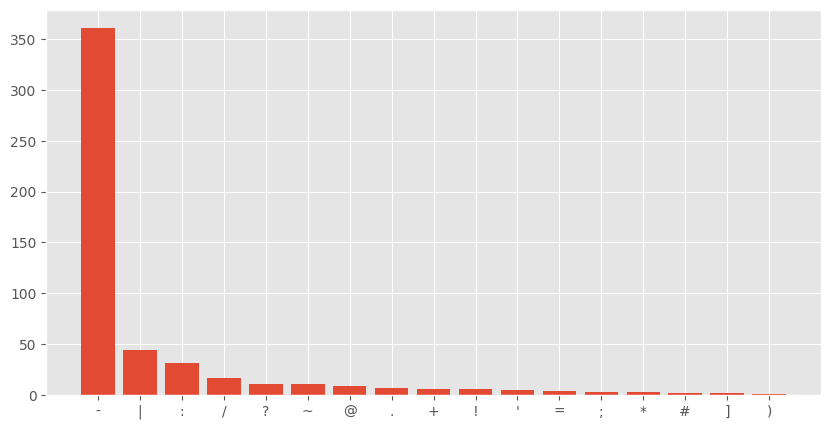

In [29]:
plot_punctuation(1)

### Ngramas analysis

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train['text']).sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

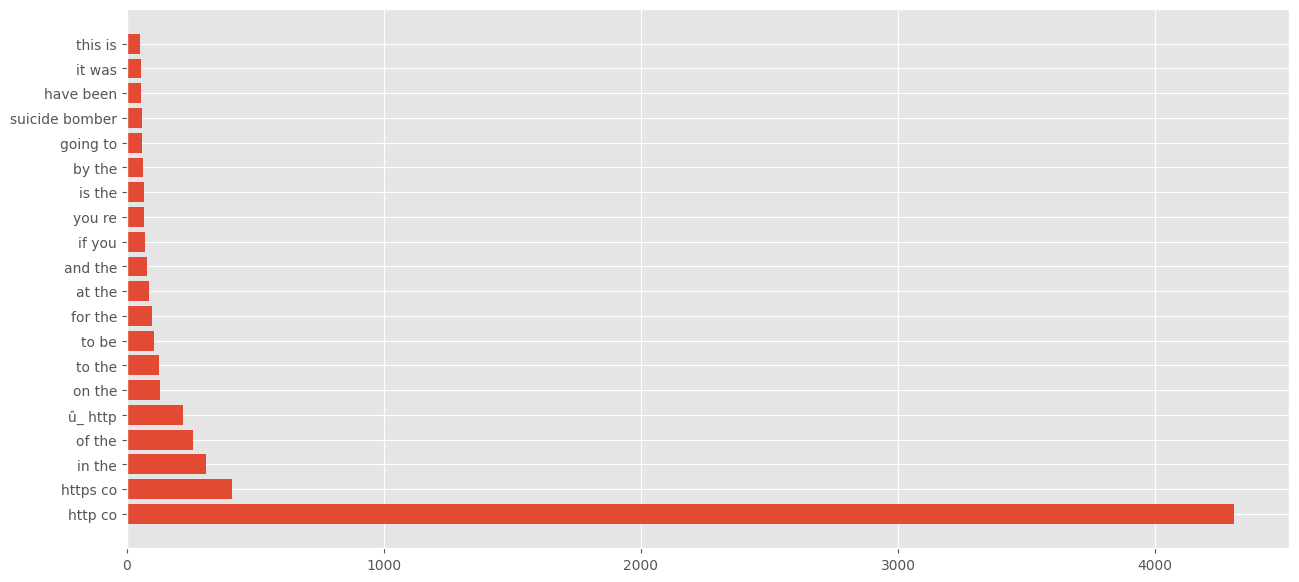

In [32]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

# we may remove these words since they don't aport any meaning.

## 3. Data cleaning

In [33]:
import re

In [34]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [35]:
remove_url("This is a test: http://localhost:8888/notebooks/Desktop/Workspace/Deep%20Neural%20Networks%20Course/11.%20Consideraciones%20de%20un%20proyecto%20de%20Deep%20Learning/code/Disaster%20Tweets.ipynb")

'This is a test: '

In [36]:
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

In [37]:
remove_html('<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>')

'Phrack World News'

In [38]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [39]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [40]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [41]:
remove_punctuation("hola #que tal")

'hola que tal'

In [42]:
# Apply cleaning functions to our dataset
X_train_prep = X_train.copy()

X_train_prep['text'] = X_train['text'].apply(remove_url)
X_train_prep['text'] = X_train['text'].apply(remove_html)
X_train_prep['text'] = X_train['text'].apply(remove_emoji)
X_train_prep['text'] = X_train['text'].apply(remove_punctuation)

In [43]:
# Aplicamos nuestras funciones de limpieza del conjunto de datos

# We use apply from pandas
X_test_prep = X_test.copy()

X_test_prep['text'] = X_test['text'].apply(remove_url)
X_test_prep['text'] = X_test['text'].apply(remove_html)
X_test_prep['text'] = X_test['text'].apply(remove_emoji)
X_test_prep['text'] = X_test['text'].apply(remove_punctuation)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train_prep['text']).sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

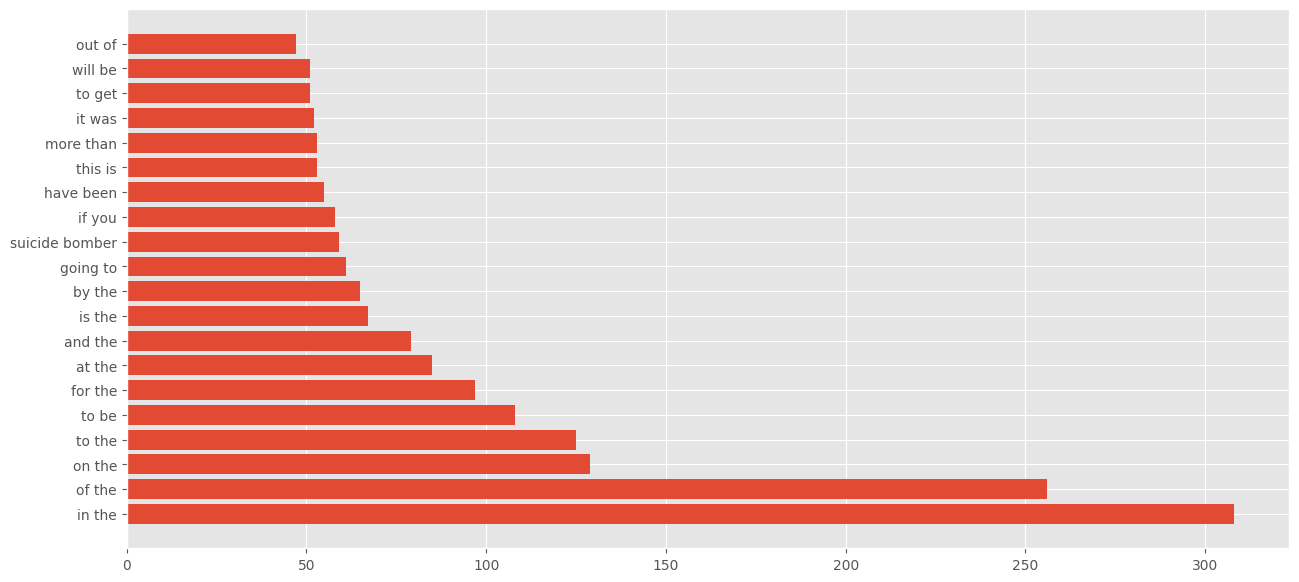

In [45]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 4. Vectorization

In [46]:
Y_train = X_train_prep['target']

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_prep['text'])

In [48]:
X_train = X_train.toarray()

In [49]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
X_test = vectorizer.transform(X_test_prep['text'])
X_test = X_test.toarray()

## 5. Dataset division

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

## 6. Model construction

In [53]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

# apply the drop out to regularize and prevent overfitting
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid')) # Binary classification, we use the sigmoid function

In [54]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [55]:
history = model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=1024,
    validation_data=(X_val, Y_val))

Epoch 1/20
7/7 [==============================] - 5s 429ms/step - loss: 0.6917 - accuracy: 0.5562 - precision: 0.4656 - val_loss: 0.6891 - val_accuracy: 0.5814 - val_precision: 1.0000
Epoch 2/20
7/7 [==============================] - 1s 209ms/step - loss: 0.6866 - accuracy: 0.5826 - precision: 0.9417 - val_loss: 0.6833 - val_accuracy: 0.5876 - val_precision: 1.0000
Epoch 3/20
7/7 [==============================] - 1s 140ms/step - loss: 0.6792 - accuracy: 0.6053 - precision: 0.9577 - val_loss: 0.6750 - val_accuracy: 0.6156 - val_precision: 1.0000
Epoch 4/20
7/7 [==============================] - 1s 131ms/step - loss: 0.6676 - accuracy: 0.6432 - precision: 0.9653 - val_loss: 0.6646 - val_accuracy: 0.6585 - val_precision: 1.0000
Epoch 5/20
7/7 [==============================] - 1s 129ms/step - loss: 0.6545 - accuracy: 0.6801 - precision: 0.9628 - val_loss: 0.6525 - val_accuracy: 0.6961 - val_precision: 1.0000
Epoch 6/20
7/7 [==============================] - 1s 129ms/step - loss: 0.6359 -

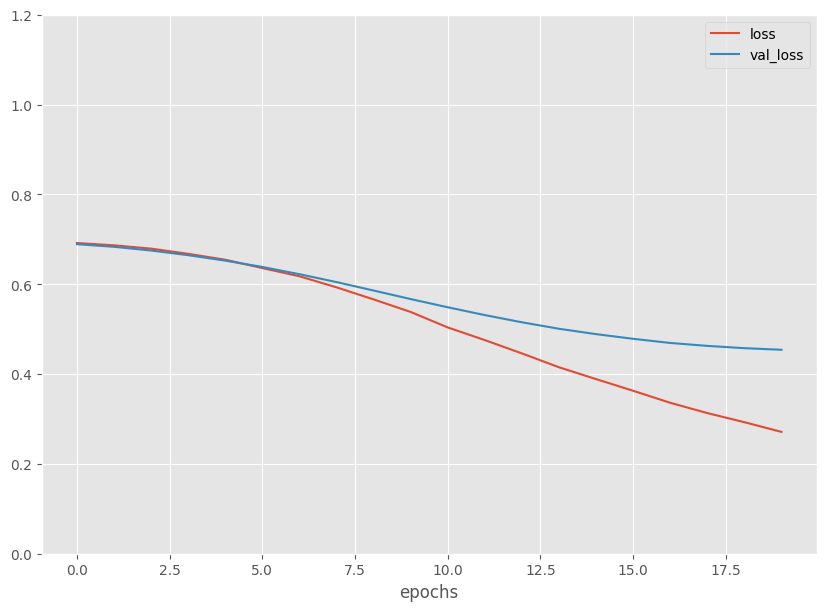

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

We observe from the previous graph that overfitting is still happening but the results are better thanks to drop out.

## 7. Model evaluation

We don't have the labels for our test set. Therefore what we can do is check the prediction and see what it has predicted vs the actual tweet.

In [57]:
Y_pred = model.predict(X_test).round(0)
Y_pred

102/102 [==============================] - 0s 3ms/step


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [58]:
for i in range(30):
    print("{} - {}".format(X_test_prep['text'][i], Y_pred[i]))

Just happened a terrible car crash - [1.]
Heard about earthquake is different cities stay safe everyone - [0.]
there is a forest fire at spot pond geese are fleeing across the street I cannot save them all - [1.]
Apocalypse lighting Spokane wildfires - [1.]
Typhoon Soudelor kills 28 in China and Taiwan - [1.]
Were shakingIts an earthquake - [1.]
Theyd probably still show more life than Arsenal did yesterday eh EH - [0.]
Hey How are you - [0.]
What a nice hat - [0.]
Fuck off - [0.]
No I dont like cold - [0.]
NOOOOOOOOO Dont do that - [0.]
No dont tell me that - [0.]
What if - [0.]
Awesome - [0.]
Birmingham Wholesale Market is ablaze BBC News  Fire breaks out at Birminghams Wholesale Market httptcoirWqCEZWEU - [1.]
sunkxssedharry will you wear shorts for race ablaze  - [0.]
PreviouslyOnDoyinTv Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze httptcoCMghxBa2XI - [1.]
Check these out httptcorOI2NSmEJJ httptco3Tj8ZjiN21 httptcoYDUiXEfIpE httptcoLxTjc87KLS nsfw - [0.]
PSA IÛªm 